In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


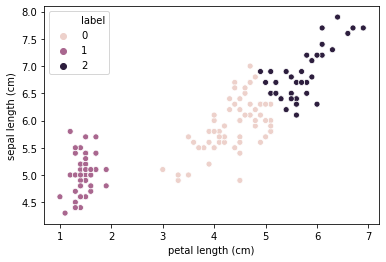

In [2]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])
df["label"] = cluster.labels_
df
cluster.cluster_centers_
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.scatterplot(x=df["petal length (cm)"],
                y=df["sepal length (cm)"],
                hue=df["label"])

K choice: [2, 3, 4, 5, 6, 7, 8, 9]
Score: [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3674845748098299, 0.3588294450965675, 0.35974549238457515, 0.3421910296019874]


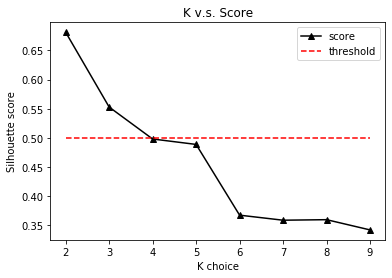

In [3]:
from sklearn.metrics import silhouette_score
x = []
y = []
for k in range(2, 10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
    s = silhouette_score(iris["data"], cluster.labels_)
    x.append(k)
    y.append(s)
print("K choice:", x)
print("Score:", y)
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
threshold = [0.5] * len(x)
plt.title("K v.s. Score")
plt.xlabel("K choice")
plt.ylabel("Silhouette score")
p1, = plt.plot(x, y, "^-k", label="score")
p2, = plt.plot(x, threshold, "--r", label="threshold")
plt.legend(handles=[p1, p2])